# Sales Analytics across Three Domains

## A. Electronics

Importing the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
import glob
import statistics

Loading the dataset - we got the electronic sales data for the year 2019

In [2]:
data_1 = pd.read_csv('Sales_April_2019.csv')
data_2 = pd.read_csv('Sales_August_2019.csv')
data_3 = pd.read_csv('Sales_December_2019.csv')
data_4 = pd.read_csv('Sales_February_2019.csv')
data_5 = pd.read_csv('Sales_January_2019.csv')
data_6 = pd.read_csv('Sales_July_2019.csv')
data_7 = pd.read_csv('Sales_June_2019.csv')
data_8 = pd.read_csv('Sales_March_2019.csv')
data_9 = pd.read_csv('Sales_May_2019.csv')
data_10 = pd.read_csv('Sales_November_2019.csv')
data_11 = pd.read_csv('Sales_October_2019.csv')
data_12 = pd.read_csv('Sales_September_2019.csv')


data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_12,data_12],axis=0)
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Lets look at the shape of the dataset

In [3]:
data.shape

(178157, 6)

Checking for null values in the dataset

In [4]:
data.isnull().sum()

Order ID            523
Product             523
Quantity Ordered    523
Price Each          523
Order Date          523
Purchase Address    523
dtype: int64

Dropping the NAs

In [5]:
data = data.dropna()

Making sure that the NAs are dropped - checking the shape and count of NAs in the dataset

In [6]:
data.shape

(177634, 6)

In [7]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Some more info about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177634 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          177634 non-null  object
 1   Product           177634 non-null  object
 2   Quantity Ordered  177634 non-null  object
 3   Price Each        177634 non-null  object
 4   Order Date        177634 non-null  object
 5   Purchase Address  177634 non-null  object
dtypes: object(6)
memory usage: 9.5+ MB


We observed a problem with the dataset - it has text repetitions

In [22]:
data['Quantity Ordered'].unique()

array([2, 1, 3, 5, 4, 7, 6, 8, 9], dtype=int64)

In order to solve this, we created a filter to drop text values and then replaced the data without text values in `Quantity Ordered` column

In [10]:
filter_repeated_values = data['Quantity Ordered'] != 'Quantity Ordered'

data = data[filter_repeated_values]

Checking if the issue is resolved

In [11]:
data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [12]:
data.shape

(177295, 6)

Next, for effective analysis, we decided to split the `Order Date` column into month, time and year

In [13]:
data['month'] = data['Order Date'].str[0:2]
data['year'] = data['Order Date'].str[6:8]
data['time'] = data['Order Date'].str[-6:-3]
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,19,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,19,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,19,09
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,19,20
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,19,16
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,19,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,17


Making sure that all the column have the proper data type

In [14]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177295 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          177295 non-null  object 
 1   Product           177295 non-null  object 
 2   Quantity Ordered  177295 non-null  int64  
 3   Price Each        177295 non-null  float64
 4   Order Date        177295 non-null  object 
 5   Purchase Address  177295 non-null  object 
 6   month             177295 non-null  object 
 7   year              177295 non-null  object 
 8   time              177295 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 13.5+ MB


Next, we created a `Sales` column = Quantity x Price

In [16]:
data['Sales'] = data['Quantity Ordered']*data['Price Each']

What was the best month for sales of Electronics during 2019?

In [17]:
#create data and group by month, sorted by sales
data_q2 = data[['month','Sales']]
data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

month
12    4613443.34
09    4193023.52
04    3390670.24
11    3196092.72
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
01    1822256.73
10       6706.62
Name: Sales, dtype: float64

The answer is `12 - December`

[Text(0.5, 1.0, 'Monthly Electronic Sales - 2019')]

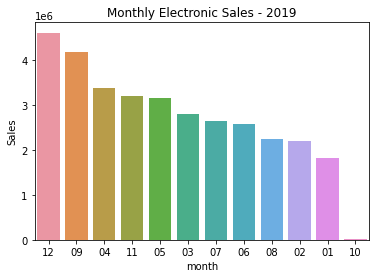

In [25]:
plot_q2 = data_q2.groupby(['month']).sum().sort_values(by=['Sales'],ascending=False)['Sales']

sns.barplot(x=plot_q2.index ,y= plot_q2).set(title="Monthly Electronic Sales - 2019")

What time should a company display advertisement to maximize likelihood of customer's buying product?

In [19]:
data_q4 = data[['time','Sales']]
data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

time
 00     688282.41
 01     435212.26
 02     227414.62
 03     133601.03
 04     151702.43
 05     220076.28
 06     416792.65
 07     700570.70
 08    1138006.62
 09    1580555.03
 10    1854082.40
 11    2179616.76
 12    2161930.58
 13    2045283.74
 14    2001343.79
 15    1843408.65
 16    1791157.91
 17    2065083.58
 18    2122253.24
 19    2296319.59
 20    2195031.43
 21    1928547.53
 22    1545134.49
 23    1132560.90
Name: Sales, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Sales'>

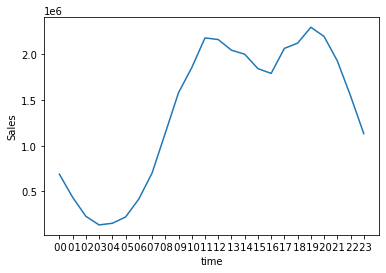

In [20]:
plot_q4 = data_q4.groupby(['time']).sum().sort_values(['time'],ascending=True)['Sales']

sns.lineplot(x=plot_q4.index , y=plot_q4)

As seen from the trend above, seems like **11 AM and 7 PM** are the two timings where ads can have most impact

## B. Lifestyle & Merchandise

Let us now look at the other two verticals in the shopping industry - Lifestyle and Merchandise. First and foremost lets load the dataset

In [3]:
alldata = pd.read_csv('supermarket_sales - Sheet1.csv')
alldata.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Since the data is loaded in successfully, let us have a detailed look into it with all the functions used above

In [4]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
alldata.shape

(1000, 17)

Checking to see if there are any duplicated values in the dataset

In [6]:
alldata.duplicated().any()

False

Checking for NAs

In [7]:
alldata.isna().any(axis=0)

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

Correlation Matrix - to check the correlation of the varous variables and attributes with one another.

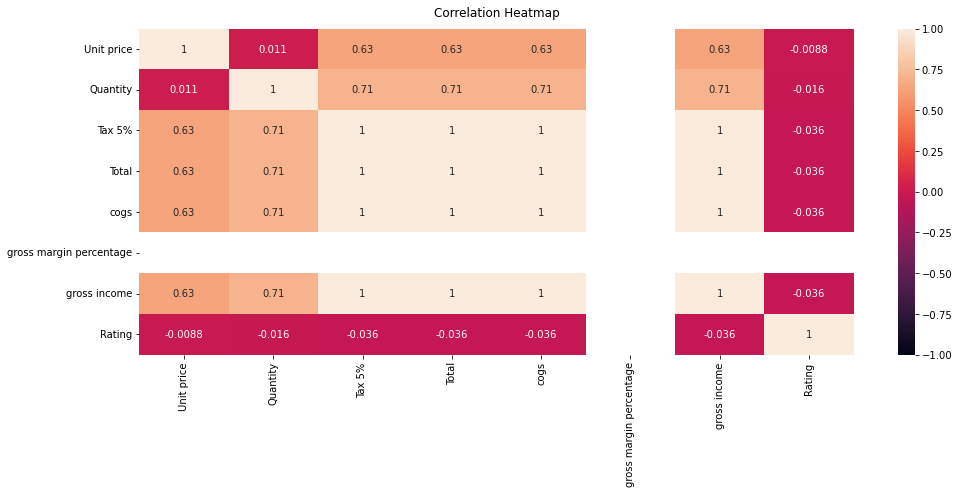

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(alldata.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Before any kind of analysis can be carried out in the dataset, we need to ensure that there is no kind of missing data, all the column names are correct, all the columns are having the correct data types etc

In [20]:
alldata['Time'] = alldata['Time'].apply(lambda x: datetime.datetime.strptime(x,'%H:%M'))
alldata['Time'] = alldata['Time'].apply(lambda x: x.strftime('%H:%M'))
alldata['Date'] = pd.to_datetime(alldata['Date'],format='%m/%d/%Y')
alldata['Month'] = alldata['Date'].apply(lambda x: x.strftime('%B'))
alldata['Hours'] = [value.split(':')[0] for value in alldata['Time']]

### EDA and Visualizations

What are the different kinds of Payment Methods being used and how are the sales distributed amongst them?

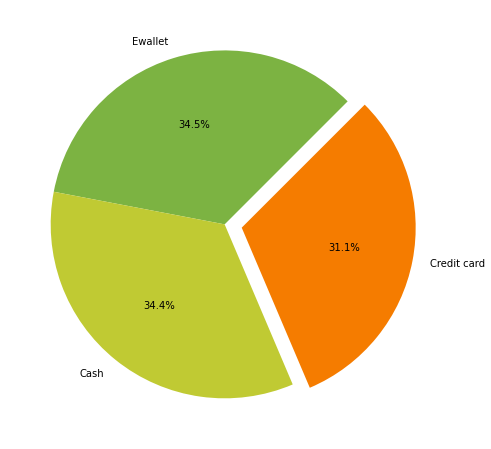

In [10]:
plt.figure(figsize=(8,8))
area = alldata['Payment'].value_counts().values
labels = list(alldata['Payment'].value_counts().keys())
colors = ['#7CB342','#C0CA33','#F57C00']
# explode = [0,0,0.1] will explode the third slice
plt.pie(area,labels=labels,
        colors=colors,
        startangle=45,
        autopct='%1.1f%%',
        shadow=False,
        explode=[0,0,0.1])
plt.show()

What are the differents lines of products offered ? What is the line that sold the most?

In [11]:
lines_of_prod = alldata['Product line'].unique()
alldata['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

**Fashion accessories** is the line that brought more sales overall.

Which product line has the higher/lower average ratings, in which city?

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

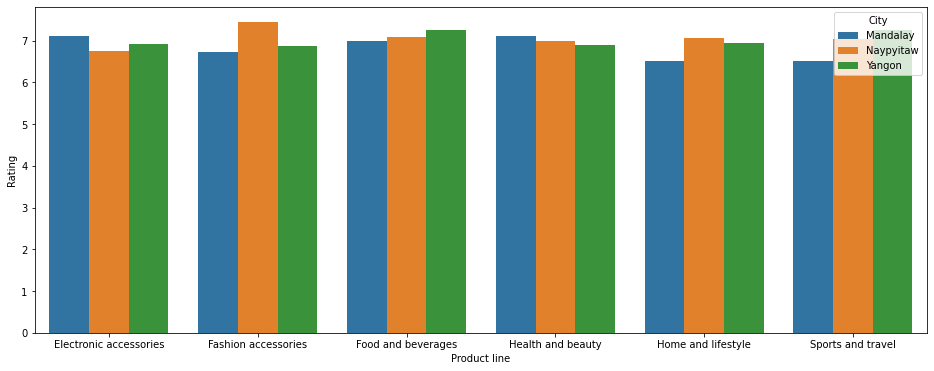

In [14]:
ratings_avg_per_line_city = alldata.groupby(['Product line', 'City']).agg({'Rating': np.mean})
ratings_avg_per_line_city = ratings_avg_per_line_city.reset_index()
plt.figure(figsize=(16, 6))
sns.barplot(data=ratings_avg_per_line_city,
            x='Product line',
            y='Rating',
            hue='City')

The competition is quite equal amongst all the product lines

In what hours of the day we sell the most/the least, quantitatively speaking?

<AxesSubplot:xlabel='Hours', ylabel='Quantity'>

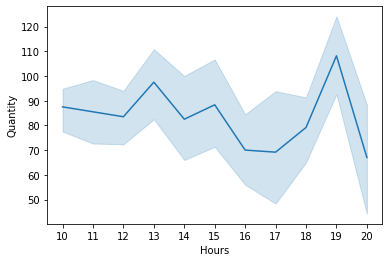

In [21]:
the_hours = alldata.groupby(by=['Hours','Product line']).agg({'Quantity':np.sum})
sns.lineplot(data=the_hours.reset_index(),x='Hours',y='Quantity')

From the graph, it can be inferred that most sales occur at **13pm and 19pm.**

For each product line?

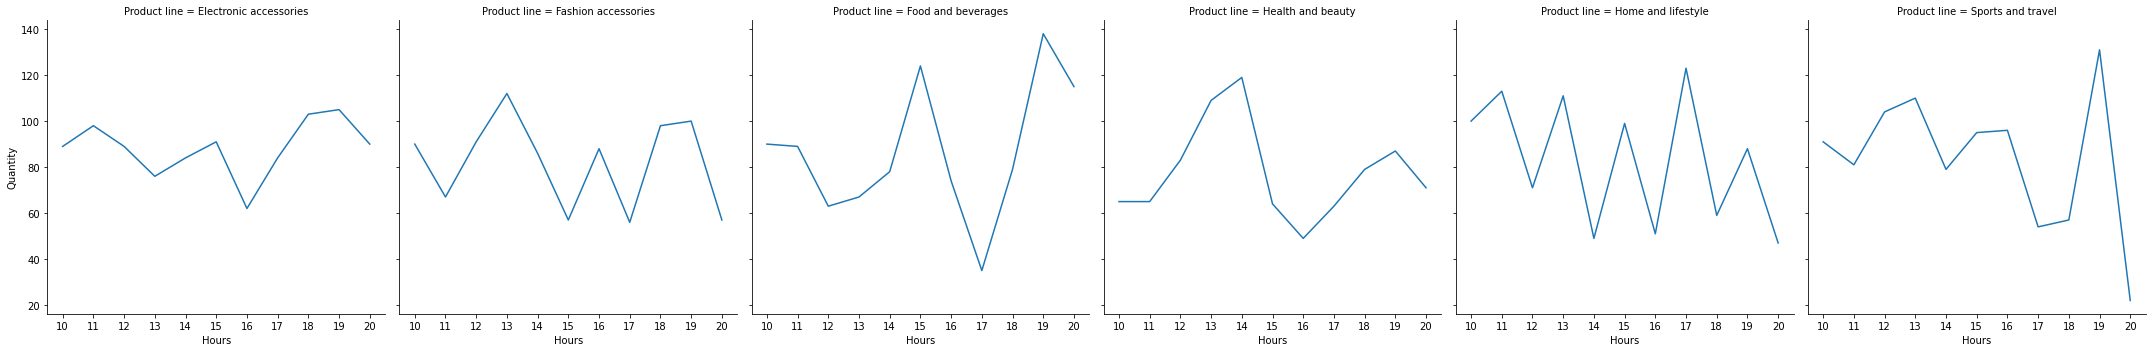

In [25]:
sns.relplot(data=the_hours.reset_index(),x='Hours',y='Quantity',col='Product line',kind='line')

Since we have the data, where we can look at the different types of payment options being used by members and non members while shopping across different branches

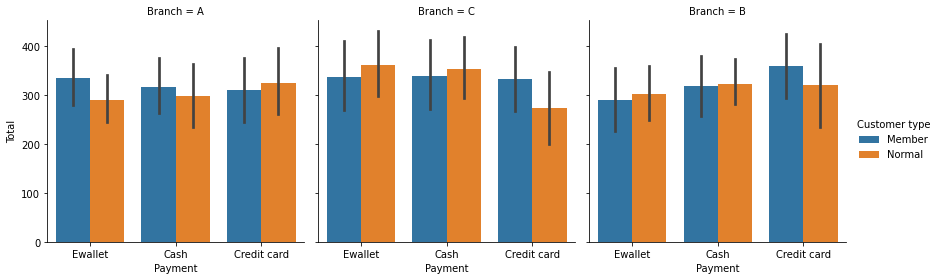

In [31]:
sns.catplot(x="Payment", y="Total",  hue="Customer type", col="Branch",
                data=alldata, kind="bar",height=4)
plt.show()

Lets have a look at the payment methods across different product lines, segregated branch wise

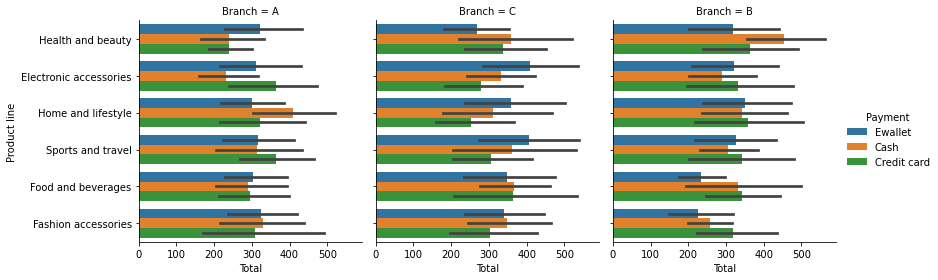

In [32]:
sns.catplot(x="Total", y="Product line",  hue="Payment", col="Branch",
                data=alldata, kind="bar", height=4, orient="h")
plt.show()

We have another column called `Rating`. Lets have a look at the ratings of different product lines, seperated Gender wise for all the different payment methods

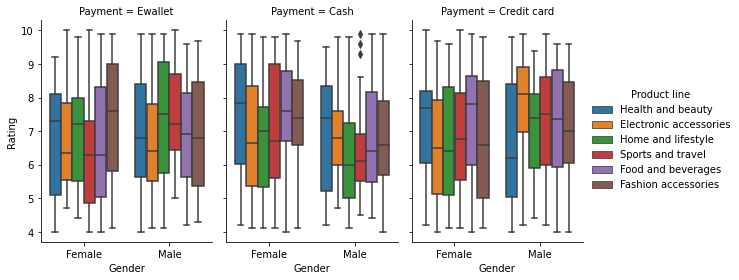

In [34]:
sns.catplot(x="Gender", y="Rating", hue="Product line", col="Payment",
            data=alldata, kind="box",height=4, aspect=.7);

### Monthly Total sales Analysis by branch

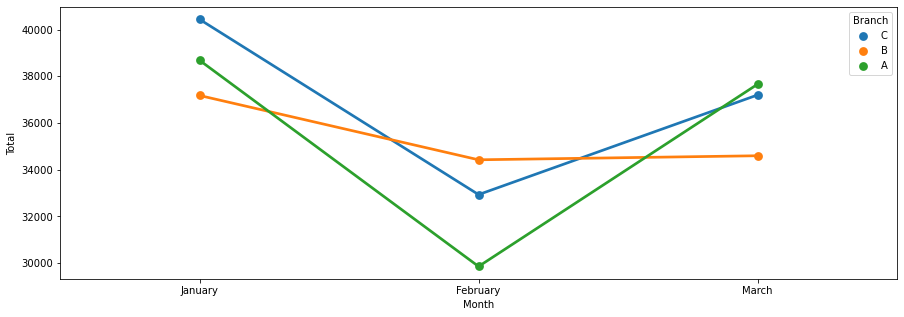

In [51]:
temp_data = alldata.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df=temp_data[["Total", 'Month','Branch',]].groupby(["Branch","Month"]).sum().reset_index().sort_values(by=['Branch','Month'],
                                                                                                    ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(data=df, x='Month', y="Total", hue='Branch')
plt.show()

### Monthly Total Sales Analysis by Product Line

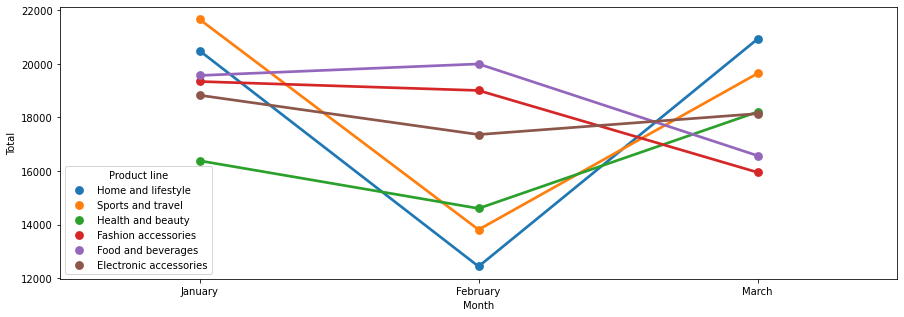

In [73]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = alldata.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df=temp_data[["Total", 'Month','Product line']].groupby(["Product line", "Month"]).sum().reset_index().sort_values(by=['Total'],ascending=True)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="Total", data=df, hue="Product line", order=["January", "February", "March"])
plt.show()

### Weekly Total Sales Analysis by Customer Type

In [68]:
# function to find day of the week based on the date field
import calendar
def findDay(date): 
    dayname = calendar.day_name[date.weekday()]
    return dayname

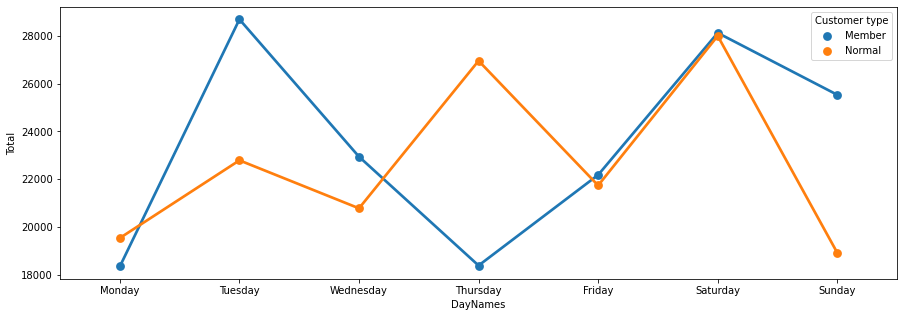

In [78]:
alldata['DayNames'] = alldata['Date'].apply(lambda x: findDay(x))
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df=alldata[["Total", 'DayNames','Customer type']].groupby(["Customer type","DayNames"]).sum().reset_index().sort_values(by=['Customer type',
                                                                                         'DayNames'], ascending=True)
# df = df.iloc[df['DayNames'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='DayNames', y="Total", data=df, hue="Customer type", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

### Weekly Total Sales Analysis by Payment Type

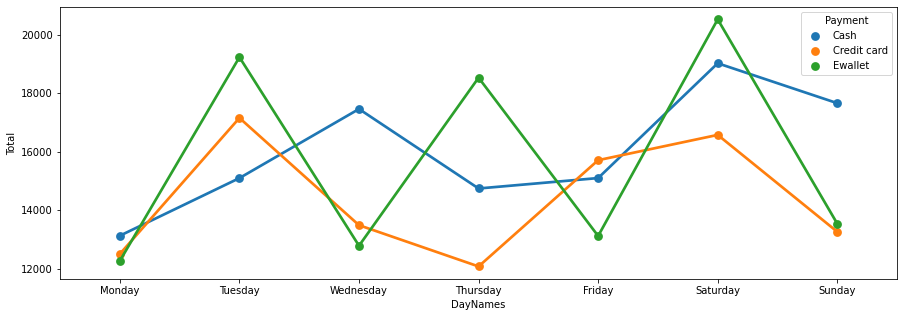

In [82]:
custom_day = {'Monday':0, 'Tuesday':1, 'Wednesday':2,
              'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df = alldata[["Total", 'DayNames',
           'Payment']].groupby(["Payment","DayNames"]).sum().reset_index().sort_values(by=['Payment',
                                                                                         'DayNames'], ascending=True)
#df = df.iloc[df['DayNames'].map(custom_day).argsort()]
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='DayNames', y="Total", data=df, hue="Payment", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

### Daily Total Sales Analysis by Gender

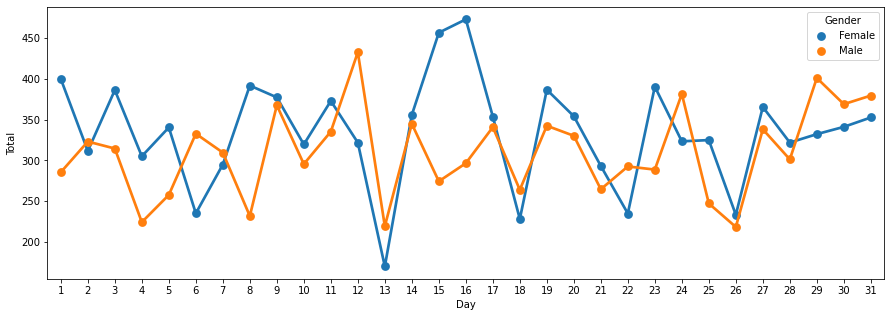

In [84]:
alldata['Day'] = alldata["Date"].dt.day
df = alldata[["Total",'Day', "Gender"]].groupby(["Day",
                                              "Gender"]).mean().reset_index().sort_values(by=['Day'], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Total", data=df, hue="Gender")
plt.show()

### Daily Sales Analysis of Product Categories

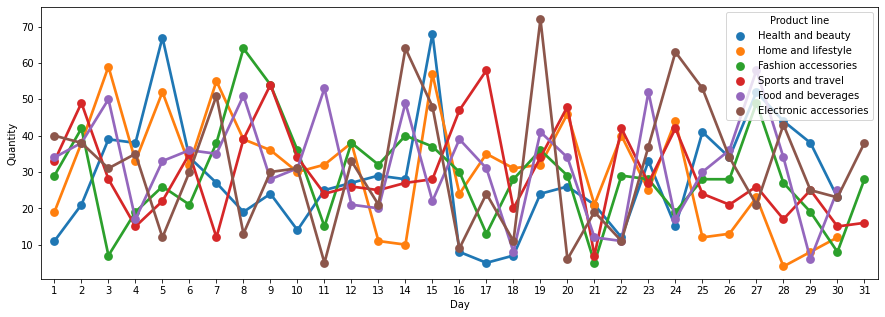

In [85]:
df = alldata[["Quantity",
           "Product line", "Day"]].groupby(["Day",
                                            "Product line"]).sum().reset_index().sort_values(by=["Day",
                                                                                                 "Quantity"], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Quantity", data=df, hue="Product line")
plt.show()